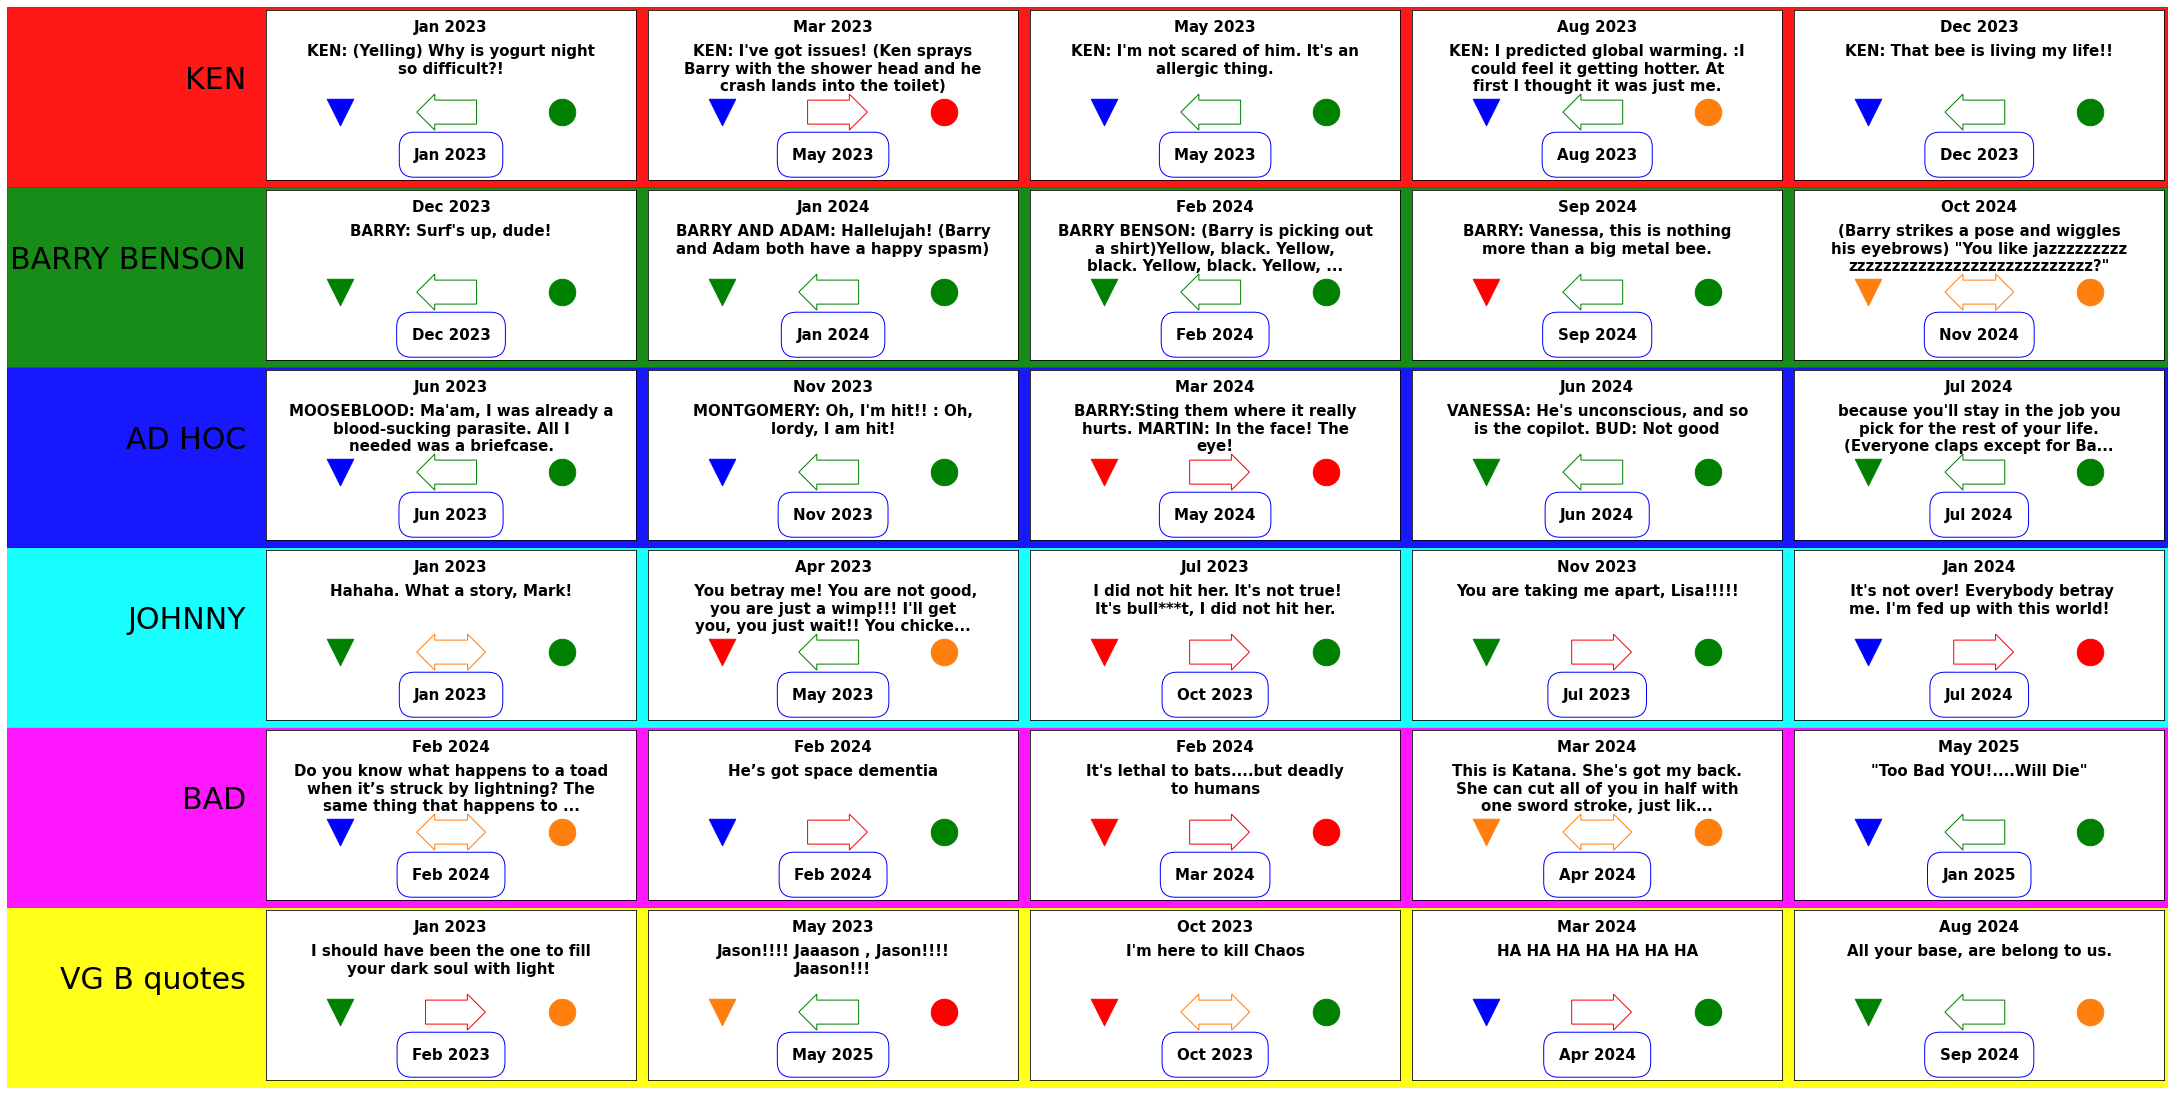

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
from datetime import datetime, timedelta, date
from dateutil.relativedelta import relativedelta
from itertools import islice, cycle
import textwrap

dataset = pd.read_csv("S16Bee.csv",encoding='cp1252')

dataset=dataset.dropna(how='all')

#create list of programmes and count list for number of rows in plt
mylist = list(dataset['Programme'].unique())
Plen=len(mylist)
#verify date columns are in datetime format for formatting later
dataset['Baseline Date']=pd.to_datetime(dataset['Baseline Date'],dayfirst='true')
dataset['Forecast Date']=pd.to_datetime(dataset['Forecast Date'],dayfirst='true')
#Amber not recognised by python so use hex code instead
dataset=dataset.replace( {'Amber': '#ff7f0e'})

#change all completed to blue for coloring later
def Milestone_Completed(x):
    if x =="Complete":
        return "Blue"
    else:
        return''
    
#define arrow type for later use to display: larrow(left <--), rarrow(-->), darrow(<-->)     
def Arrow(x):
    if x =="Green":
        return "larrow"
    if x =="Red":
        return "rarrow"
    else:
        return'darrow'
#restrict name length of activities    
def SHRTNAME(x):
    if len(x) >100:
        return x[0:97] + "..."
    else:
        return x

#map functions to corresponding columns to show
dataset.loc[dataset['Status'] == "Complete",'Status']=dataset['Status'].map(Milestone_Completed)
dataset['Arrow']=dataset['3-month Trend'].map(Arrow)
dataset["ActivityName100Char"] = dataset['ACTNAME'].map(SHRTNAME)
#Format Forecast date to month Year (changes column type to string)
dataset['Forecast Date']=dataset['Forecast Date'].dt.strftime('%b %Y')
#set loop parameters:y for each row and x for each subplot/box
y=0
x=0
#set plot dimensions (columns currently manually input but can be automated)
fig, ax1 = plt.subplots(Plen,ncols=5,figsize=(30,15),constrained_layout=True,sharex=True,sharey=True)
#loop through programmes/mylist
for s in mylist:
    y+=1
    #isolate each programme data set for each row and sort by baseline date column 
    #so they're order in each column from older-newst; then can change baseline foramt anf datatype
    Prog=dataset.loc[(dataset['Programme']==s)]
    Prog=Prog.sort_values(by='Baseline Date')
    Prog['Baseline Date']=Prog['Baseline Date'].dt.strftime('%b %Y')
#    now to cycle through each activity/milestone; each plotted in its own box
    for an in list(Prog['ACTNAME'].unique()):
        x+=1
        #plt.subplot used to highlight/isolate corresponding plot number with x corresponding to the box being plotted
        plt.subplot(Plen, 5, x)
        #isolate row of data for each plot
        q=Prog.loc[(Prog['ACTNAME']==an)]
        
        #attain labels(ACTYNAME), dates((Baseline DAte)), FCD(Forecase DAte),arrow(Arrow type of 3month) ,arrowcol (3monthrend column)
        labels=list(q['ActivityName100Char'])
        dates=list(q['Baseline Date'])[0]
        FCD=list(q['Forecast Date'])[0]
        arrow=list(q['Arrow'])[0]
        arrowcol=list(q['3-month Trend'])[0]
        #plts status marker (left most)
        plt.scatter(0.2,0.4, linestyle="-", marker="v", s=700,color=q['Status'])
        #plts Trend marker (right most)
        plt.scatter(0.8,0.4, linestyle="-", marker="o", s=700,color=q['Trend Confidence'])
        #plts baseline date (top most)
        plt.text(0.5, 0.9, dates, va='center', ha='center',fontsize=15,weight='bold') 
        #plts activity name
        plt.text(0.5, 0.8, textwrap.fill(labels[0],width=35), va='top', ha='center',fontsize=15,weight='bold')
        #plts Forecast date (bottom most)
        plt.text(0.5, 0.15, FCD, va='center', ha='center',fontsize=15,weight='bold',
                 bbox=dict(facecolor='none', edgecolor='blue', boxstyle='round,pad=1'))
        #plts 3 month trend arrow
        plt.text(0.5, 0.4, '        ', va='center', ha='center',fontsize=15,weight='bold',
                 bbox=dict(facecolor='none', edgecolor=arrowcol, boxstyle=arrow))#,width=0.7))

    #removes x axis and y axis ticks from each box
        plt.xticks([])
        plt.yticks([])

    #each box has dimensions set at (0,1)(0,1); used for positioning plts above
        plt.ylim([0, 1])
        plt.xlim([0, 1])

#label each row my valuse from mylist
for ax, row in zip(ax1[:,0], mylist):
    ax.set_ylabel(row,rotation='horizontal', fontsize=30,ha='right',labelpad=20)

#colouring the baCKGROUND OF EACH ROW
my_clist = ['yellow','magenta','cyan','blue','green','red']  
adjust=1/Plen
y=0
for i in mylist:
    #bbox = ax1[y][y].get_position()
    rect = plt.Rectangle((0,adjust*y),1,adjust, color=my_clist[y], zorder=-1, alpha=0.9)
    fig.add_artist(rect)
    y+=1

plt.show()